## Import Libraries and Data

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.colors import ListedColormap
import statsmodels.api as sm
from scipy.stats import boxcox
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.set_option('display.max_columns', None)

In [40]:
import os
import zipfile
from datetime import datetime

In [4]:
#import data
#specify the file path
file_path = "/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Human_Resources_Data_Set/data/archive.zip"

target_dir = os.path.splitext(file_path)[0]

with zipfile.ZipFile(file_path, "r") as zip_ref:
    zip_ref.extractall(target_dir)

# List the contents of the target directory
print(f"Contents of {target_dir}:")
for root, dirs, files in os.walk(target_dir):
    for file in files:
        print(os.path.join(root, file))

Contents of /Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Human_Resources_Data_Set/data/archive:
/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Human_Resources_Data_Set/data/archive/HRDataset_v14.csv


In [5]:
# Specify the path to the extracted CSV file
csv_file_path = os.path.join(target_dir, "HRDataset_v14.csv")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_file_path)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [6]:
df.info()    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [7]:
### some columns are very similar ###
print(df[["MarriedID","MaritalStatusID","MaritalDesc"]])
print(df[["GenderID","Sex"]])
print(df[["HispanicLatino","RaceDesc"]])
print(df['RaceDesc'].unique())

     MarriedID  MaritalStatusID MaritalDesc
0            0                0      Single
1            1                1     Married
2            1                1     Married
3            1                1     Married
4            0                2    Divorced
..         ...              ...         ...
306          0                0      Single
307          0                0      Single
308          0                0      Single
309          0                0      Single
310          0                4     Widowed

[311 rows x 3 columns]
     GenderID Sex
0           1  M 
1           1  M 
2           0   F
3           0   F
4           0   F
..        ...  ..
306         1  M 
307         0   F
308         0   F
309         0   F
310         0   F

[311 rows x 2 columns]
    HispanicLatino RaceDesc
0               No    White
1               No    White
2               No    White
3               No    White
4               No    White
..             ...      ...
306         

In [92]:
df[['racedesc','racedescid']].head(20)

,racedesc,racedescid
0,White,0
1,White,0
2,White,0
3,White,0
4,White,0
5,White,0
6,White,0
7,White,0
8,Black or African American,1
9,White,0


In [8]:
df.columns= df.columns.str.lower()
df['hispaniclatino'].str.lower()

In [9]:
#no correspondence of empstatusid
print(df['empstatusid'].unique())

[1 5 3 4 2]


In [ ]:
### department ###
df[['deptid','department']].sort_values(by="deptid", ascending=False)
print(df['deptid'].unique())
print(df['department'].unique())

In [25]:
###performance###
print(df['perfscoreid'].unique())
print(df['performancescore'].unique())

[4 3 2 1]
['Exceeds' 'Fully Meets' 'Needs Improvement' 'PIP']


## Data Cleaning/Processing

### Null Values

In [10]:
### edit managerid  null cell. ###
print(df['managerid'].unique())
df[["managerid","managername"]].sort_values(by="managerid", ascending=False)

[22.  4. 20. 16. 39. 11. 10. 19. 12.  7. 14. 18. nan  3.  2.  1. 17.  5.
 21.  6. 15. 13.  9. 30.]


,managerid,managername
276,39.0,Webster Butler
89,39.0,Webster Butler
105,39.0,Webster Butler
206,39.0,Webster Butler
280,39.0,Webster Butler
...,...,...
88,NaN,Webster Butler
135,NaN,Webster Butler
177,NaN,Webster Butler
232,NaN,Webster Butler


In [12]:
### edit managerid  null cell. ###
#select managerid are null and correspondent managername
print(df[pd.isnull(df['managerid'])][['managerid', 'managername']].sort_values(by='managername'))

# Select rows where managername is 'Webster Butler'
webster_butler_rows = df[df['managername'] == 'Webster Butler']

# Check if there are any non-null managerid values for Webster Butler
if not webster_butler_rows['managerid'].isnull().all():
    # Get the first non-null managerid value for Webster Butler
    webster_butler_id = webster_butler_rows['managerid'].dropna().iloc[0]
    print(f"The managerid for Webster Butler is: {webster_butler_id}")
else:
    print("Webster Butler has no non-null managerid.")

     managerid     managername
19         NaN  Webster Butler
30         NaN  Webster Butler
44         NaN  Webster Butler
88         NaN  Webster Butler
135        NaN  Webster Butler
177        NaN  Webster Butler
232        NaN  Webster Butler
251        NaN  Webster Butler
The managerid for Webster Butler is: 39.0


In [13]:
# Assign managerid 39.0 to rows where managername is 'Webster Butler'
df.loc[df['managername'] == 'Webster Butler', 'managerid'] = 39.0
df['managerid'].isnull().unique()

array([False])

In [14]:
### what about null cell in dateoftermination? ###
print(df['dateoftermination'].isnull().value_counts())
df[pd.isnull(df['dateoftermination'])][['dateoftermination', 'termd','termreason']]

True     207
False    104
Name: dateoftermination, dtype: int64


,dateoftermination,termd,termreason
0,NaN,0,N/A-StillEmployed
3,NaN,0,N/A-StillEmployed
5,NaN,0,N/A-StillEmployed
6,NaN,0,N/A-StillEmployed
7,NaN,0,N/A-StillEmployed
...,...,...,...
305,NaN,0,N/A-StillEmployed
306,NaN,0,N/A-StillEmployed
308,NaN,0,N/A-StillEmployed
309,NaN,0,N/A-StillEmployed


In [15]:
# Select rows where dateoftermination is null
null_termination_rows = df[pd.isnull(df['dateoftermination'])]

# Check if all termid values are 0 for these rows
if null_termination_rows['termd'].eq(0).all():
    print("All termid values are 0 for rows where dateoftermination is null.")
else:
    print("Some termid values are not 0 for rows where dateoftermination is null.")
### 0:still employed, 1:NOT EMPLOYED ANYMORE

All termid values are 0 for rows where dateoftermination is null.


### Datetime Format

In [16]:
### total years of employment ###

# Transform date object in datetime format
df[['dateofhire','dateoftermination','lastperformancereview_date']] = df[['dateofhire','dateoftermination','lastperformancereview_date']].apply(pd.to_datetime,errors='coerce')

In [17]:
# calculate total years employees worked 
df['employment_years'] = ((df['dateoftermination'] - df['dateofhire']).dt.days/365).round(2)
df[['dateofhire', 'dateoftermination', 'employment_years']]

,dateofhire,dateoftermination,employment_years
0,2011-07-05,NaT,NaN
1,2015-03-30,2016-06-16,1.22
2,2011-07-05,2012-09-24,1.22
3,2008-01-07,NaT,NaN
4,2011-07-11,2016-09-06,5.16
...,...,...,...
306,2014-07-07,NaT,NaN
307,2008-09-02,2015-09-29,7.08
308,2010-04-10,NaT,NaN
309,2015-03-30,NaT,NaN


In [45]:
### dob ###
# Convert 'dob' column to datetime format
df['dob'] = pd.to_datetime(df['dob'])

# Check for values in 'dob' column that are in the future
future_dates = df[df['dob'] > datetime.now()]
print(future_dates)
#70 rows

             employee_name  empid  marriedid  maritalstatusid  genderid  \
8         Bachiochi, Linda  10114          0                0         0   
16        Beak, Kimberly    10023          1                1         0   
17     Beatrice, Courtney   10055          0                0         0   
20         Bernstein, Sean  10046          0                0         1   
21         Biden, Lowan  M  10226          0                2         0   
..                     ...    ...        ...              ...       ...   
290          Vega, Vincent  10144          0                2         1   
296   Wallace, Courtney  E  10274          1                1         0   
301          Wilber, Barry  10048          1                1         1   
303  Williams, Jacquelyn    10264          0                0         0   
304     Winthrop, Jordan    10033          0                0         1   

     empstatusid  deptid  perfscoreid  fromdiversityjobfairid  salary  termd  \
8              3   

In [51]:
### age of employers ###

df['dob'] = pd.to_datetime(df['dob'])
# Identify and assign NaN to future dates in 'dob' column
df.loc[df['dob'] > datetime.now(), 'dob'] = np.nan
current_date = datetime.now()
df['age'] = (current_date - df['dob']).astype('<m8[Y]').fillna(-1).astype(int)

In [52]:
df[['age', 'dob']].head(20)

,age,dob
0,40,1983-07-10
1,48,1975-05-05
2,35,1988-09-19
3,35,1988-09-27
4,34,1989-09-08
5,46,1977-05-22
6,44,1979-05-24
7,40,1983-02-18
8,-1,NaT
9,35,1988-01-07


In [89]:
df.to_csv('/Users/adrianacuppuleri/Desktop/GITHUB ADRIANA/Human_Resources_Data_Set/data/cleaned_HR_dataset.csv', index=False)

## Data Distribution

In [65]:
# Separate columns by data type
num_df = df.select_dtypes(include=['int', 'float'])
cat_df = df.select_dtypes(include='object')
dt_df = df.select_dtypes(include='datetime')

In [72]:
# Convert 'hipanic' column values to lowercase
cat_df['hispaniclatino'] = cat_df['hispaniclatino'].str.lower()

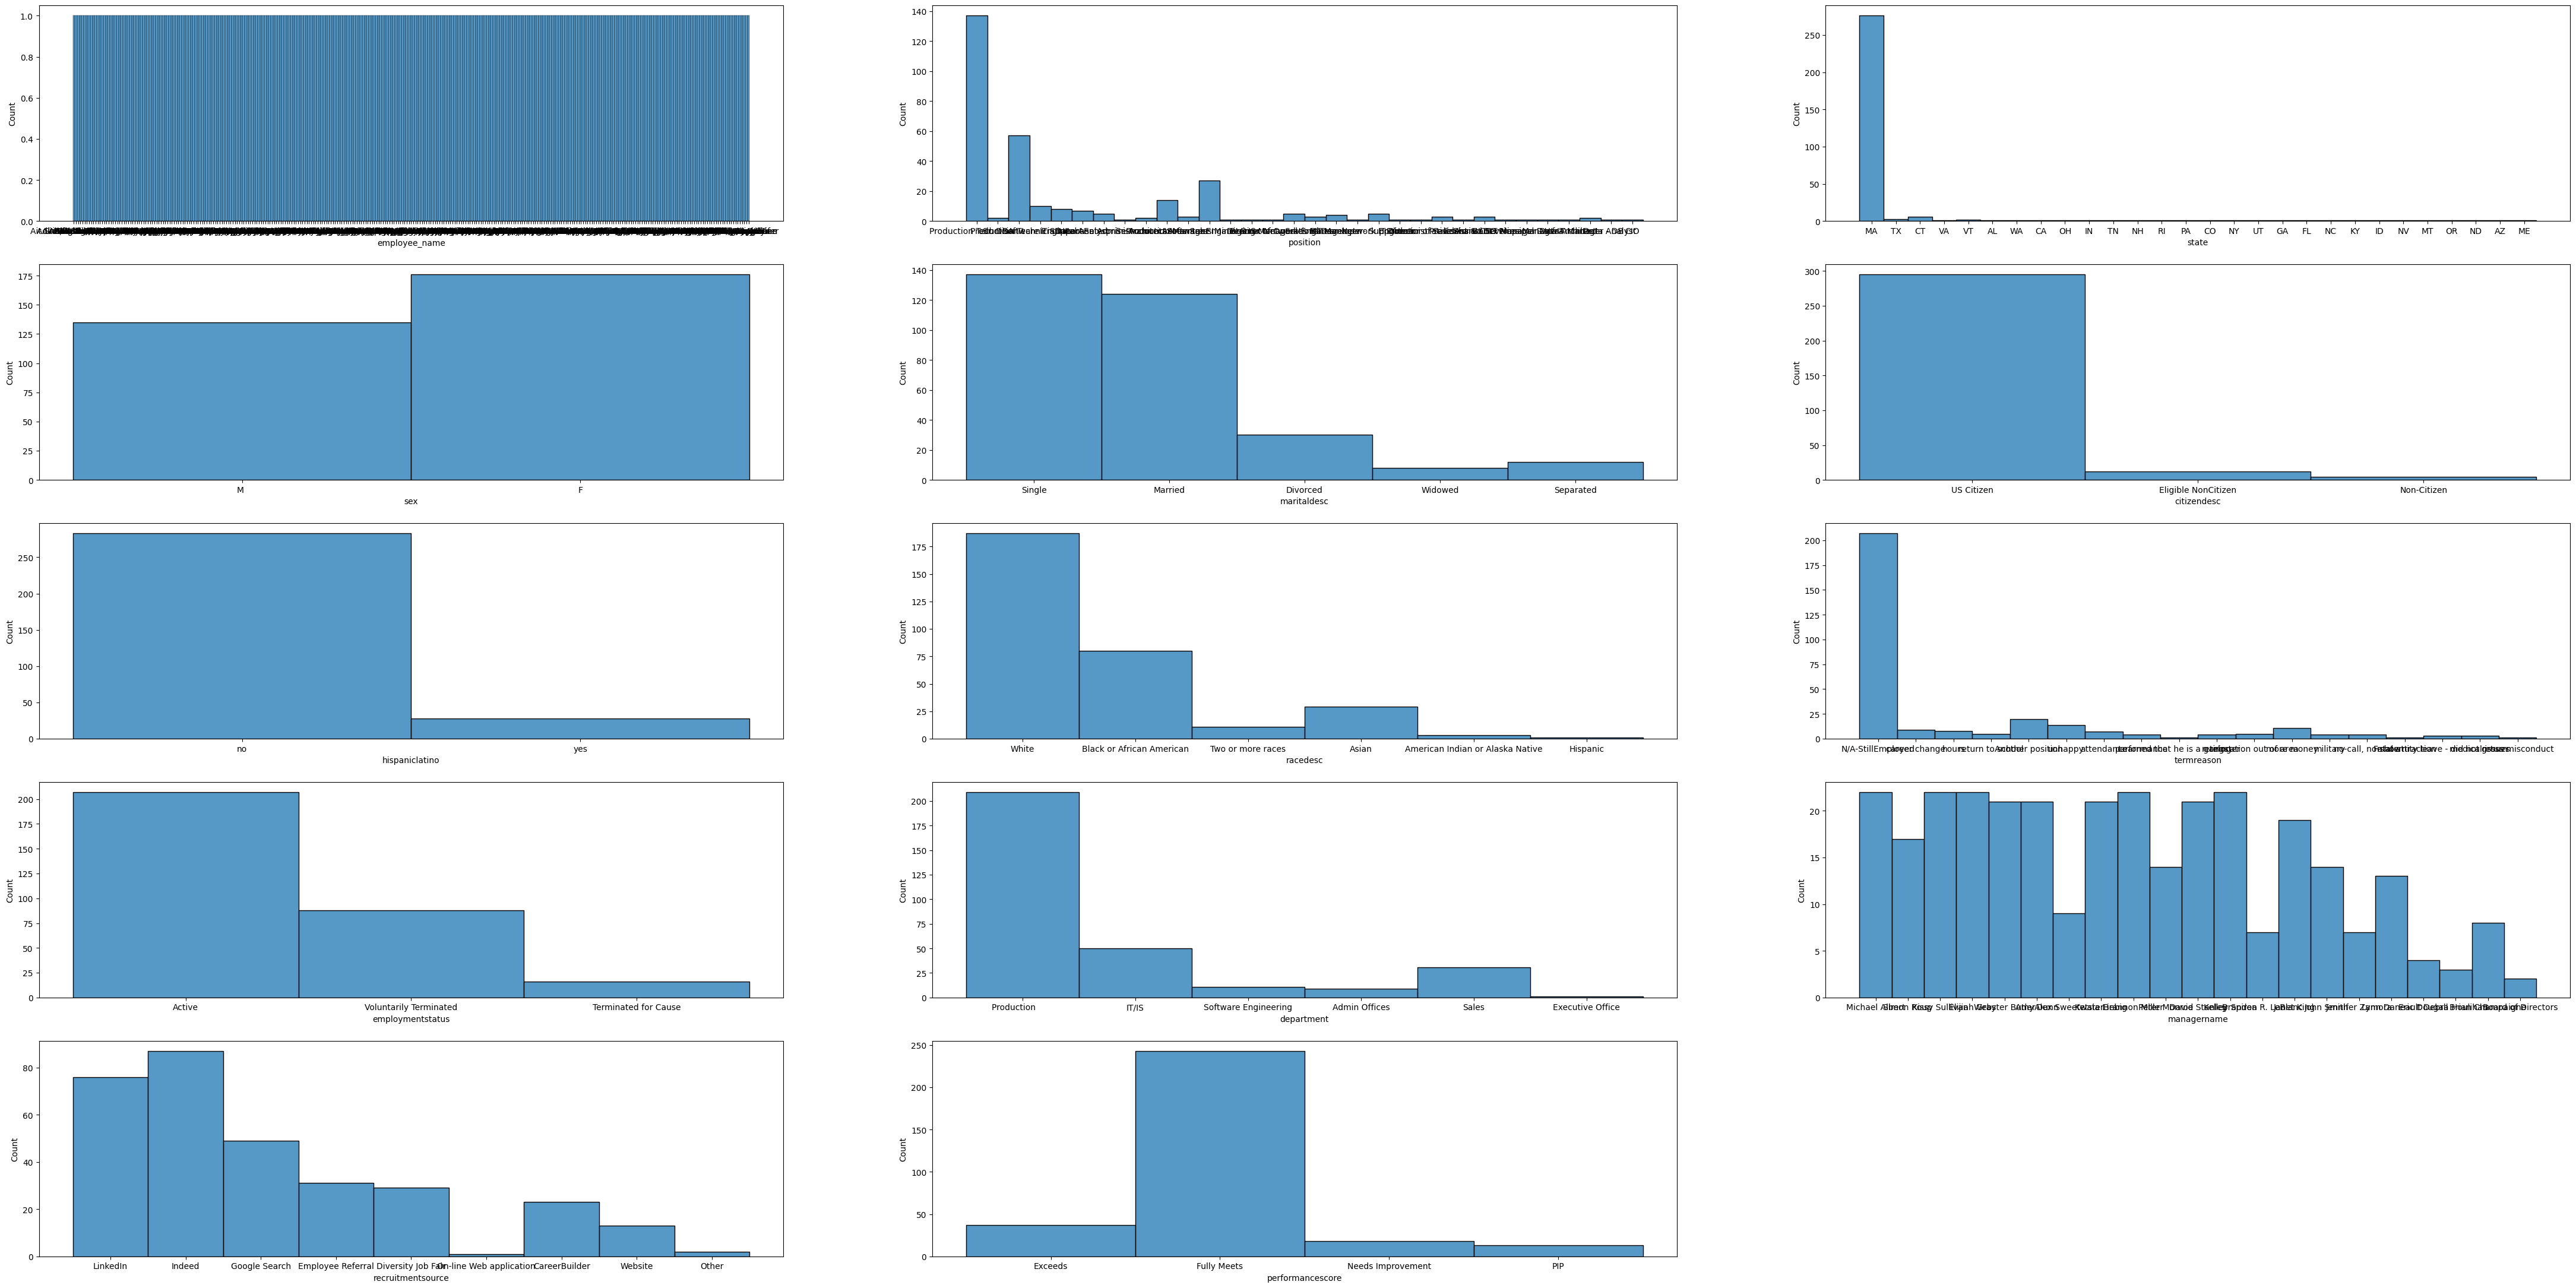

In [73]:
#### plot categorical data ####
plt.figure(figsize=(55,50))
for i, column in enumerate(cat_df.columns,1):
    plt.subplot(9,3,i)
    sns.histplot(cat_df[column])
#mostly employed in production and from MA state
#mostly single or married
#mostly US citizens
#more F than M
#mostly non-hispanic
#mostly white
#mostly linkedin or indeed
#some managername have much more employees than others

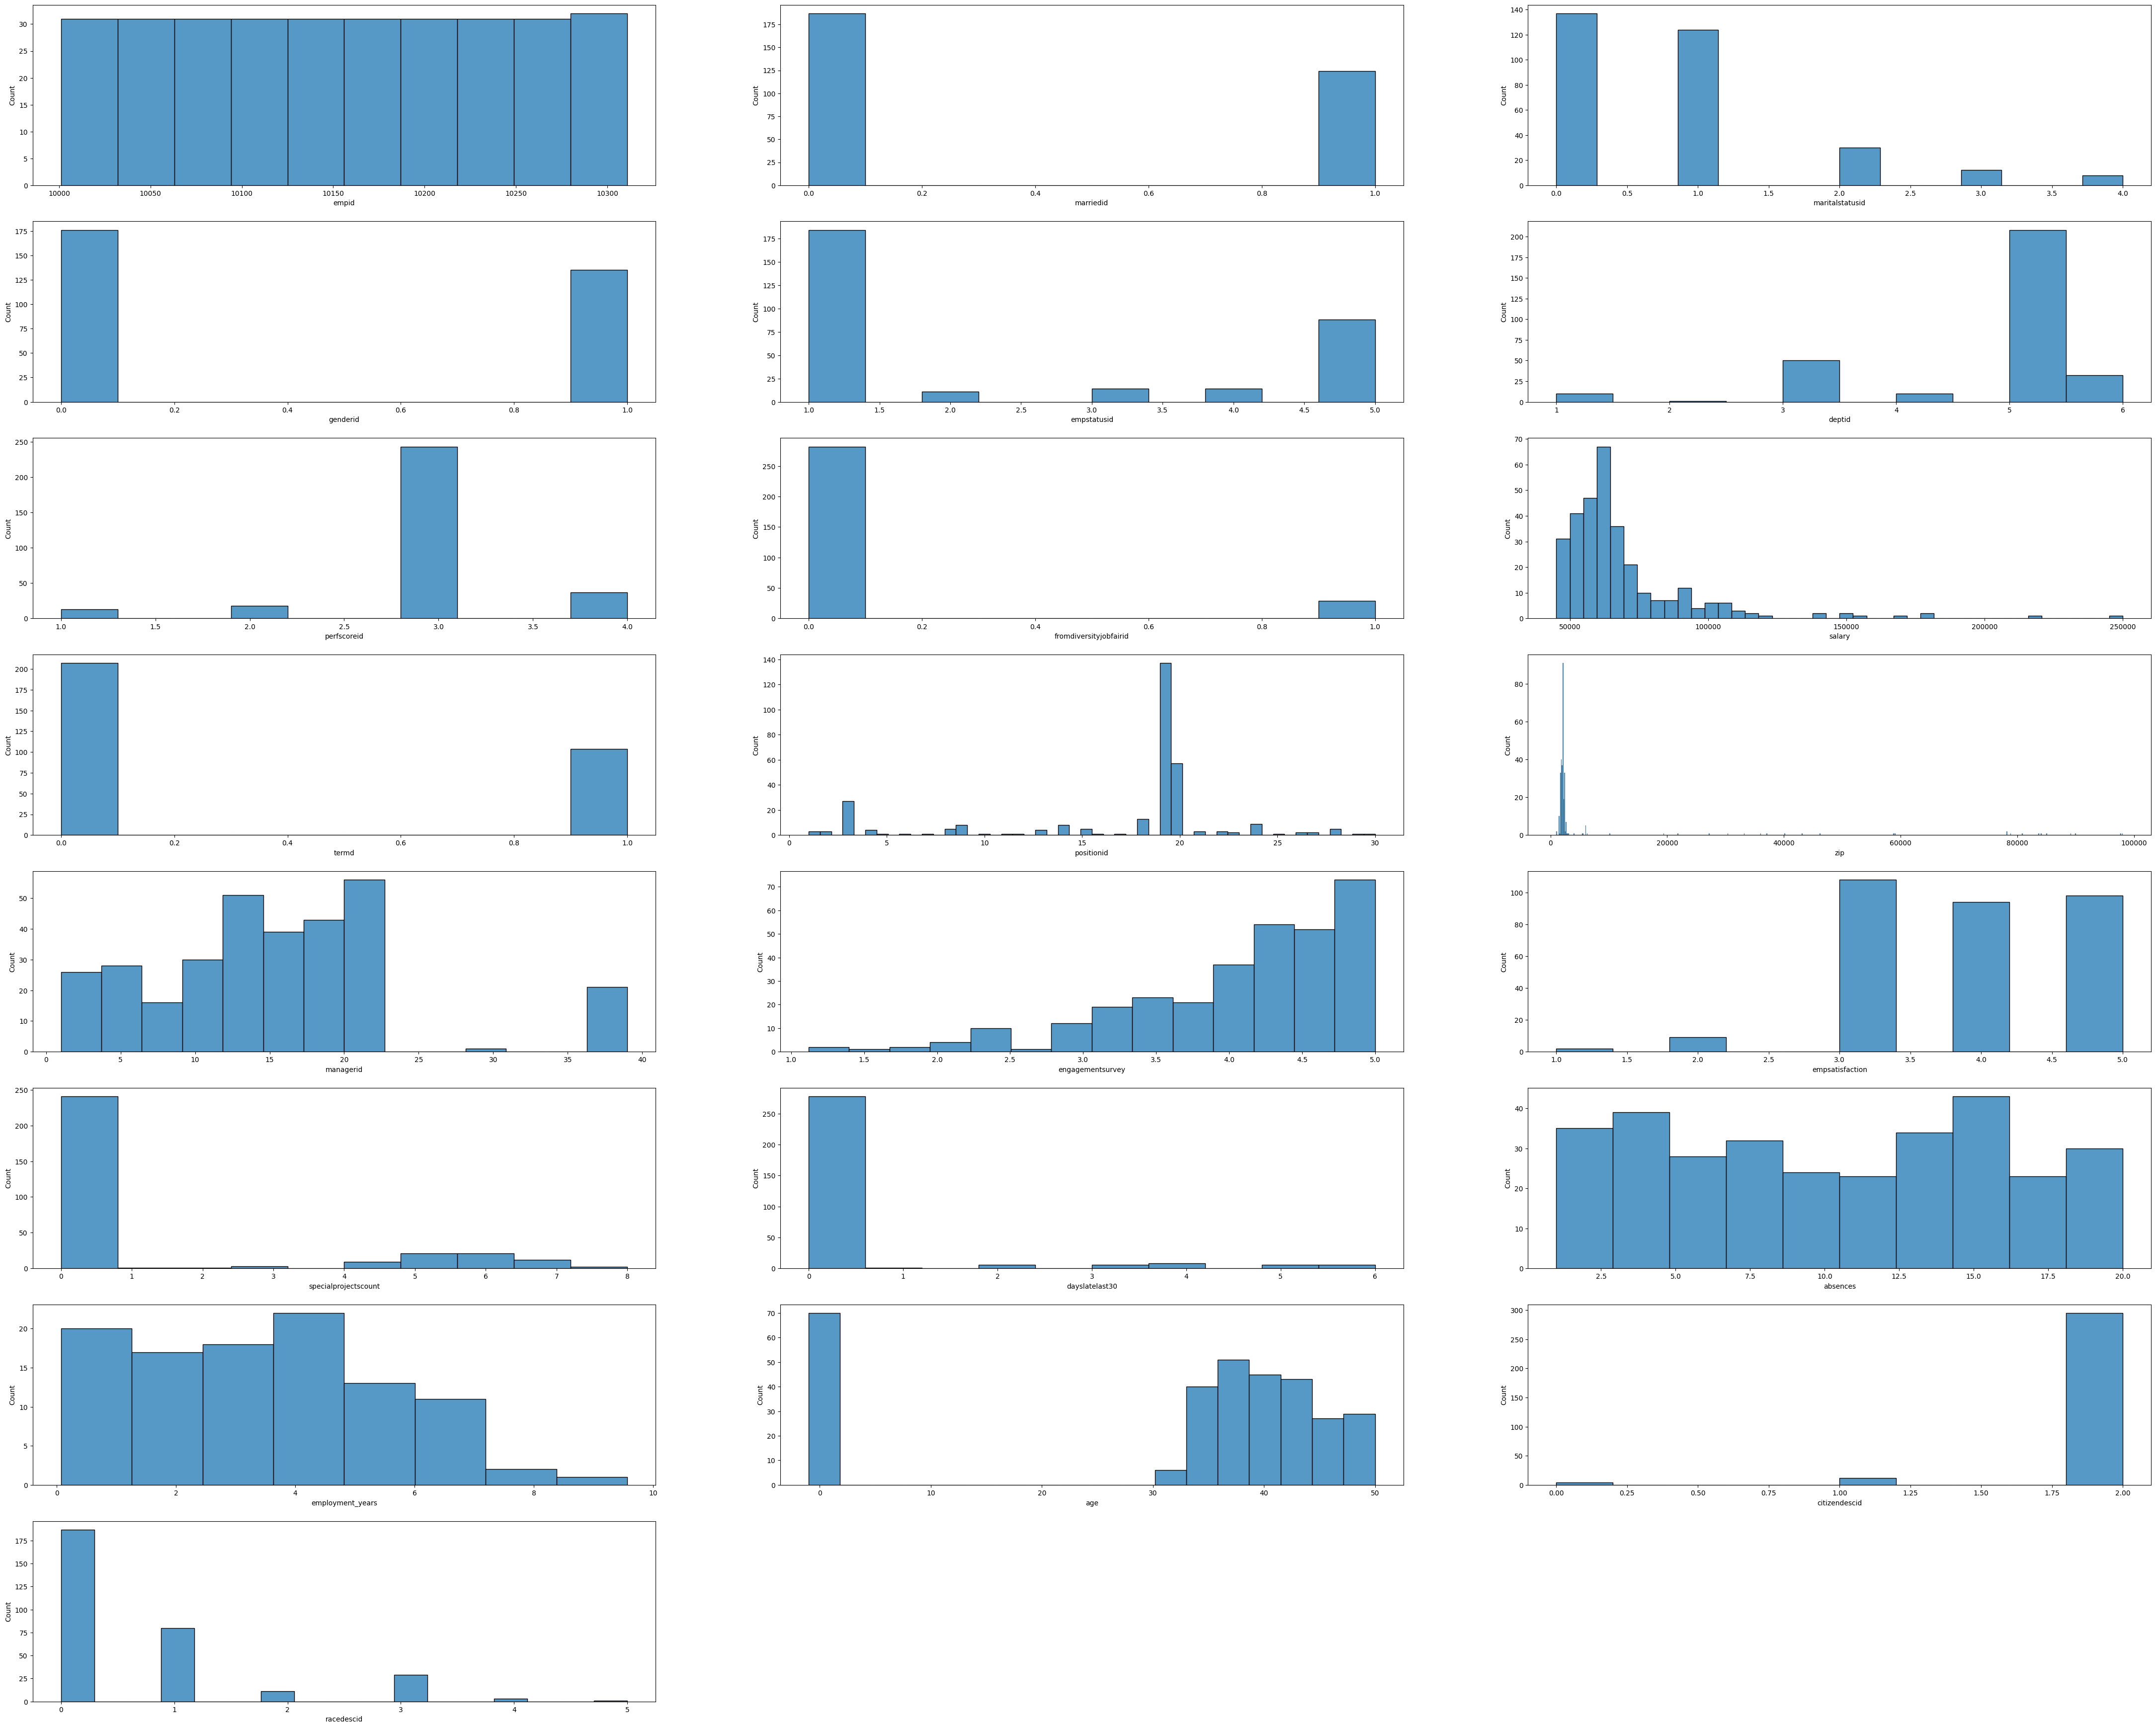

In [75]:
plt.figure(figsize=(55,50))
for i, column in enumerate(num_df.columns,1):
    plt.subplot(9,3,i)
    sns.histplot(num_df[column])
#most relevant info: salary, employment years, age, absences

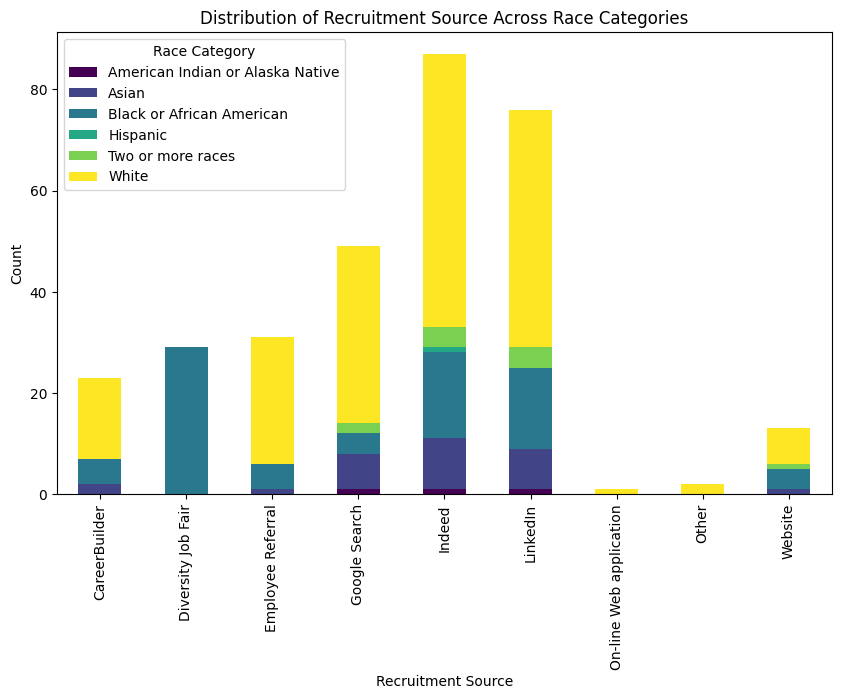

In [97]:
# Count the occurrences of each combination of recruitmentsource and racedesc
grouped_df = df.groupby(['recruitmentsource', 'racedesc']).size().unstack(fill_value=0)

# Plot the grouped bar chart
ax = grouped_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

# Customize the plot
plt.title('Distribution of Recruitment Source Across Race Categories')
plt.xlabel('Recruitment Source')
plt.ylabel('Count')
plt.legend(title='Race Category')

# Show the plot
plt.show()